#### SYS ID: Finding the params

In [1]:
from moldy.case_studies.baloo_sim.model.baloo_sim_sys_id_wrapper import BalooSimSysIdWrapper
from lmfit import Model, Parameter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

baloo_model = BalooSimSysIdWrapper()

In [2]:
def get_data(inputs_path, outputs_path):

    # import data
    # sim_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/sys_id_data"
    # hw_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/"
    baloo_input_validation_data = np.load(inputs_path)
    baloo_output_validation_data = np.load(outputs_path)

    # hw_path = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs"
    # baloo_input_validation_data = np.load(f'{hw_path}/not_smooth_all_inputs.npy')[:30000]
    # baloo_output_validation_data = np.load(f'{hw_path}/not_smooth_all_outputs.npy')[:30000]

    p0 = baloo_input_validation_data[:,0].reshape((1, -1))
    p1 = baloo_input_validation_data[:,1].reshape((1, -1))
    p2 = baloo_input_validation_data[:,2].reshape((1, -1))
    p3 = baloo_input_validation_data[:,3].reshape((1, -1))
    p4 = baloo_input_validation_data[:,4].reshape((1, -1))
    p5 = baloo_input_validation_data[:,5].reshape((1, -1))
    p6 = baloo_input_validation_data[:,6].reshape((1, -1))
    p7 = baloo_input_validation_data[:,7].reshape((1, -1))
    p8 = baloo_input_validation_data[:,8].reshape((1, -1))
    p9 = baloo_input_validation_data[:,9].reshape((1, -1))
    p10 = baloo_input_validation_data[:,10].reshape((1, -1))
    p11 = baloo_input_validation_data[:,11].reshape((1, -1))

    p0_dot = baloo_output_validation_data[:,0].reshape((1, -1))
    p1_dot = baloo_output_validation_data[:,1].reshape((1, -1))
    p2_dot = baloo_output_validation_data[:,2].reshape((1, -1))
    p3_dot = baloo_output_validation_data[:,3].reshape((1, -1))
    p4_dot = baloo_output_validation_data[:,4].reshape((1, -1))
    p5_dot = baloo_output_validation_data[:,5].reshape((1, -1))
    p6_dot = baloo_output_validation_data[:,6].reshape((1, -1))
    p7_dot = baloo_output_validation_data[:,7].reshape((1, -1))
    p8_dot = baloo_output_validation_data[:,8].reshape((1, -1))
    p9_dot = baloo_output_validation_data[:,9].reshape((1, -1))
    p10_dot = baloo_output_validation_data[:,10].reshape((1, -1))
    p11_dot = baloo_output_validation_data[:,11].reshape((1, -1))

    u0_dot = baloo_input_validation_data[:,12].reshape((1, -1))
    v0_dot = baloo_input_validation_data[:,13].reshape((1, -1))
    u1_dot = baloo_input_validation_data[:,14].reshape((1, -1))
    v1_dot = baloo_input_validation_data[:,15].reshape((1, -1))
    u2_dot = baloo_input_validation_data[:,16].reshape((1, -1))
    v2_dot = baloo_input_validation_data[:,17].reshape((1, -1))

    u0_ddot = baloo_output_validation_data[:,12].reshape((1, -1))
    v0_ddot = baloo_output_validation_data[:,13].reshape((1, -1))
    u1_ddot = baloo_output_validation_data[:,14].reshape((1, -1))
    v1_ddot = baloo_output_validation_data[:,15].reshape((1, -1))
    u2_ddot = baloo_output_validation_data[:,16].reshape((1, -1))
    v2_ddot = baloo_output_validation_data[:,17].reshape((1, -1))

    u0 = baloo_input_validation_data[:,18].reshape((1, -1))
    v0 = baloo_input_validation_data[:,19].reshape((1, -1))
    u1 = baloo_input_validation_data[:,20].reshape((1, -1))
    v1 = baloo_input_validation_data[:,21].reshape((1, -1))
    u2 = baloo_input_validation_data[:,22].reshape((1, -1))
    v2 = baloo_input_validation_data[:,23].reshape((1, -1))

    u0_dot_output = baloo_output_validation_data[:,18].reshape((1, -1))
    v0_dot_output = baloo_output_validation_data[:,19].reshape((1, -1))
    u1_dot_output = baloo_output_validation_data[:,20].reshape((1, -1))
    v1_dot_output = baloo_output_validation_data[:,21].reshape((1, -1))
    u2_dot_output = baloo_output_validation_data[:,22].reshape((1, -1))
    v2_dot_output = baloo_output_validation_data[:,23].reshape((1, -1))

    p0_cmd = baloo_input_validation_data[:,24].reshape((1, -1))
    p1_cmd = baloo_input_validation_data[:,25].reshape((1, -1))
    p2_cmd = baloo_input_validation_data[:,26].reshape((1, -1))
    p3_cmd = baloo_input_validation_data[:,27].reshape((1, -1))
    p4_cmd = baloo_input_validation_data[:,28].reshape((1, -1))
    p5_cmd = baloo_input_validation_data[:,29].reshape((1, -1))
    p6_cmd = baloo_input_validation_data[:,30].reshape((1, -1))
    p7_cmd = baloo_input_validation_data[:,31].reshape((1, -1))
    p8_cmd = baloo_input_validation_data[:,32].reshape((1, -1))
    p9_cmd = baloo_input_validation_data[:,33].reshape((1, -1))
    p10_cmd = baloo_input_validation_data[:,34].reshape((1, -1))
    p11_cmd = baloo_input_validation_data[:,35].reshape((1, -1))

    from moldy.case_studies.baloo_left_hw.learnedModel_baloo_hw import LearnedModel_BalooHW

    baloo_hw_model = LearnedModel_BalooHW(use_gpu=False)
    baloo_model.xMax = baloo_hw_model.xMax
    baloo_model.xMin = baloo_hw_model.xMin
    baloo_model.uMax = baloo_hw_model.uMax
    baloo_model.uMin = baloo_hw_model.uMin

    #%% Define state and input vectors 
    x_truth = np.vstack((p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, u0_dot, v0_dot, u1_dot, v1_dot, u2_dot, v2_dot, u0, v0, u1, v1, u2, v2)).T
    xdot_truth = np.vstack((p0_dot, p1_dot, p2_dot, p3_dot, p4_dot, p5_dot, p6_dot, p7_dot, p8_dot, p9_dot, p10_dot, p11_dot, u0_ddot, v0_ddot, u1_ddot, v1_ddot, u2_ddot, v2_ddot, u0_dot_output, v0_dot_output, u1_dot_output, v1_dot_output, u2_dot_output, v2_dot_output)).T

    u = np.vstack((p0_cmd, p1_cmd, p2_cmd, p3_cmd, p4_cmd, p5_cmd, p6_cmd, p7_cmd, p8_cmd, p9_cmd, p10_cmd, p11_cmd)).T

    # denormalize data
    x_truth = (x_truth * ((baloo_hw_model.xMax - baloo_hw_model.xMin) / 2)) + ((baloo_hw_model.xMax + baloo_hw_model.xMin) / 2)
    xdot_truth = (xdot_truth * ((baloo_hw_model.xMax - baloo_hw_model.xMin) / 2)) + ((baloo_hw_model.xMax + baloo_hw_model.xMin) / 2)
    u = (u * ((baloo_hw_model.uMax - baloo_hw_model.uMin) / 2)) + ((baloo_hw_model.uMax + baloo_hw_model.uMin) / 2)

    print(f'Size of x: {np.shape(x_truth)}')
    print(f'Size of xdot: {np.shape(xdot_truth)}')
    print(f'Size of u: {np.shape(u)}')

    return x_truth, xdot_truth, u

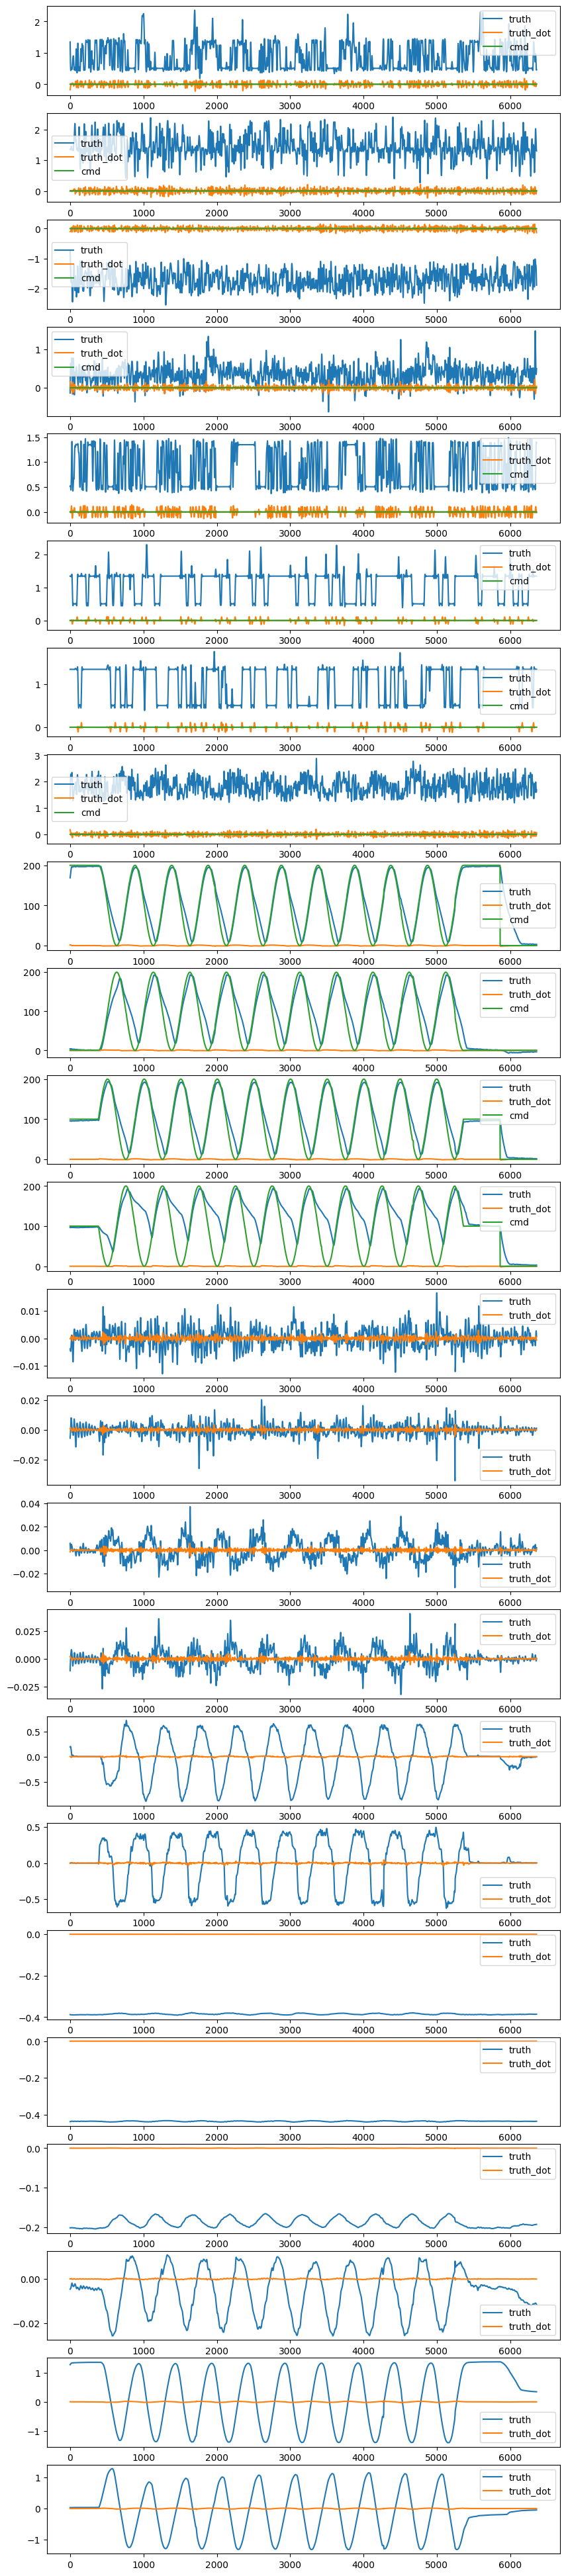

In [32]:
fig, axs = plt.subplots(24, 1, figsize=(10, 50))
start = 0
end = 10000

for i in range(12):
    axs[i].plot(x_truth[start:end,i], label='truth')
    axs[i].plot(xdot_truth[start:end,i], label='truth_dot')
    axs[i].plot(u[start:end,i], label="cmd")
    axs[i].legend()

for i in range(12, 24):
    axs[i].plot(x_truth[start:end,i], label='truth')
    axs[i].plot(xdot_truth[start:end,i], label='truth_dot')
    axs[i].legend()

In [5]:
# create the fitting model
model = Model(baloo_model.curvefit_wrapper, independent_vars=['x', 'u'])

print(f'Parameters to Optimize: {model.param_names}')
print(f'Independent Variables: {model.independent_vars}')

print(f'\n\nMax vals: {baloo_model.max_vals}')
print(f'Min vals: {baloo_model.min_vals}')

Parameters to Optimize: ['large_mass', 'large_radius', 'large_bellows_radius', 'large_bellows_effective_area', 'large_lumped_stiffness', 'large_lumped_damping', 'large_pressure_time_constant', 'medium_mass', 'medium_radius', 'medium_bellows_radius', 'medium_bellows_effective_area', 'medium_lumped_stiffness', 'medium_lumped_damping', 'medium_pressure_time_constant', 'small_mass', 'small_radius', 'small_bellows_radius', 'small_bellows_effective_area', 'small_lumped_stiffness', 'small_lumped_damping', 'small_pressure_time_constant']
Independent Variables: ['x', 'u']


Max vals: {'large_mass': 22.0, 'large_radius': 0.25, 'large_bellows_radius': 0.1, 'large_bellows_effective_area': 0.025, 'large_lumped_stiffness': 135, 'large_lumped_damping': 85, 'large_pressure_time_constant': 0.25, 'medium_mass': 7.5, 'medium_radius': 0.25, 'medium_bellows_radius': 0.05, 'medium_bellows_effective_area': 0.05, 'medium_lumped_stiffness': 75, 'medium_lumped_damping': 20, 'medium_pressure_time_constant': 0.25

In [6]:
#%% Run the fit on the model
numStarts = 4
nonlinear_fit = [None]*numStarts

for i in range(numStarts):
    start_val = np.random.uniform(-1, 1, 21)
    nonlinear_fit[i] = model.fit(
        xdot_truth, x=x_truth, u=u,
        # normalized parameters to find. 
        large_mass=Parameter("large_mass", value=start_val[0].item(0), min=-1, max=1),
        large_radius=Parameter("large_radius", value=start_val[1].item(0), min=-1, max=1),
        large_bellows_radius=Parameter("large_bellows_radius", value=start_val[2].item(0), min=-1, max=1),
        large_bellows_effective_area=Parameter("large_bellows_effective_area", value=start_val[3].item(0), min=-1, max=1),
        large_lumped_stiffness=Parameter("large_lumped_stiffness", value=start_val[4].item(0), min=-1, max=1),
        large_lumped_damping=Parameter("large_lumped_damping", value=start_val[5].item(0), min=-1, max=1),
        large_pressure_time_constant=Parameter("large_pressure_time_constant", value=start_val[6].item(0), min=-1, max=1),
        medium_mass=Parameter("medium_mass", value=start_val[7].item(0), min=-1, max=1),
        medium_radius=Parameter("medium_radius", value=start_val[8].item(0), min=-1, max=1),
        medium_bellows_radius=Parameter("medium_bellows_radius", value=start_val[9].item(0), min=-1, max=1),
        medium_bellows_effective_area=Parameter("medium_bellows_effective_area", value=start_val[10].item(0), min=-1, max=1),
        medium_lumped_stiffness=Parameter("medium_lumped_stiffness", value=start_val[11].item(0), min=-1, max=1),
        medium_lumped_damping=Parameter("medium_lumped_damping", value=start_val[12].item(0), min=-1, max=1),
        medium_pressure_time_constant=Parameter("medium_pressure_time_constant", value=start_val[13].item(0), min=-1, max=1),
        small_mass=Parameter("small_mass", value=start_val[14].item(0), min=-1, max=1),
        small_radius=Parameter("small_radius", value=start_val[15].item(0), min=-1, max=1),
        small_bellows_radius=Parameter("small_bellows_radius", value=start_val[16].item(0), min=-1, max=1),
        small_bellows_effective_area=Parameter("small_bellows_effective_area", value=start_val[17].item(0), min=-1, max=1),
        small_lumped_stiffness=Parameter("small_lumped_stiffness", value=start_val[18].item(0), min=-1, max=1),
        small_lumped_damping=Parameter("small_lumped_damping", value=start_val[19].item(0), min=-1, max=1),
        small_pressure_time_constant=Parameter("small_pressure_time_constant", value=start_val[20].item(0), min=-1, max=1),        
        method="least_squares",
    )    
    print(f"Run {i} R^2 value: {nonlinear_fit[i].rsquared}")

Run 0 R^2 value: -3913.4874257141664
Run 1 R^2 value: -3913.671143112061
Run 2 R^2 value: -3914.189327341623
Run 3 R^2 value: -3913.8706910882


In [11]:
for i in range(numStarts):
    unscaled_params = baloo_model.unscale_params(nonlinear_fit[i].params)
    print(f'unscaled params for run = {i}')
    for key in unscaled_params.keys():
        print(f'{key}: {unscaled_params[key]}')

unscaled params for run = 0
large_mass: 20.983954118555754
large_radius: 0.19656796879093885
large_bellows_radius: 0.04561621883152214
large_bellows_effective_area: 0.01346826451777213
large_lumped_stiffness: 134.83853668237418
large_lumped_damping: 76.12887676505564
large_pressure_time_constant: 0.08324085921524735
medium_mass: 3.1857711957000463
medium_radius: 0.18138017744995974
medium_bellows_radius: 0.0307684105386875
medium_bellows_effective_area: 0.030988637473006356
medium_lumped_stiffness: 60.51123715528741
medium_lumped_damping: 12.078275959412125
medium_pressure_time_constant: 0.05078771116295993
small_mass: 3.718770779092328
small_radius: 0.143761679247719
small_bellows_radius: 0.09224893153113814
small_bellows_effective_area: 0.02071186796636776
small_lumped_stiffness: 42.11283968563935
small_lumped_damping: 27.915253299988798
small_pressure_time_constant: 0.30939498494453843
unscaled params for run = 1
large_mass: 21.205116199541973
large_radius: 0.10778775407079129
large

In [25]:
x_truth_denorm[1,:].reshape((1, baloo_sys_id_model.numStates))

array([[ 1.172e+00,  1.346e+00, -8.428e-01,  2.366e-02,  5.209e-01,
         1.347e+00,  1.347e+00,  1.514e+00,  1.704e+02,  3.929e+00,
         9.564e+01,  9.647e+01, -3.984e-03, -4.968e-03,  4.326e-03,
        -8.619e-03,  1.968e-01, -2.109e-04, -3.882e-01, -4.383e-01,
        -2.013e-01, -4.541e-03,  1.279e+00,  3.060e-02]])

Size of x: (1451647, 24)
Size of xdot: (1451647, 24)
Size of u: (1451647, 12)
Joint 0 Pressures:  [ 4429.524  6823.051 11025.589  5347.334]
Joint 1 Pressures:  [ 8413.582 10785.618  8498.458  7732.218]
Joint 2 Pressures:  [12850.365 17792.108 18396.955 15187.859]

Joint 0 Velocities: [190.499 179.112]
Joint 1 Velocities: [312.581 274.839]
Joint 2 Velocities: [143.193 180.493]

Joint 0 Positions: [883.293 682.586]
Joint 1 Positions: [1245.918 1054.256]
Joint 2 Positions: [ 732.958 1086.438]


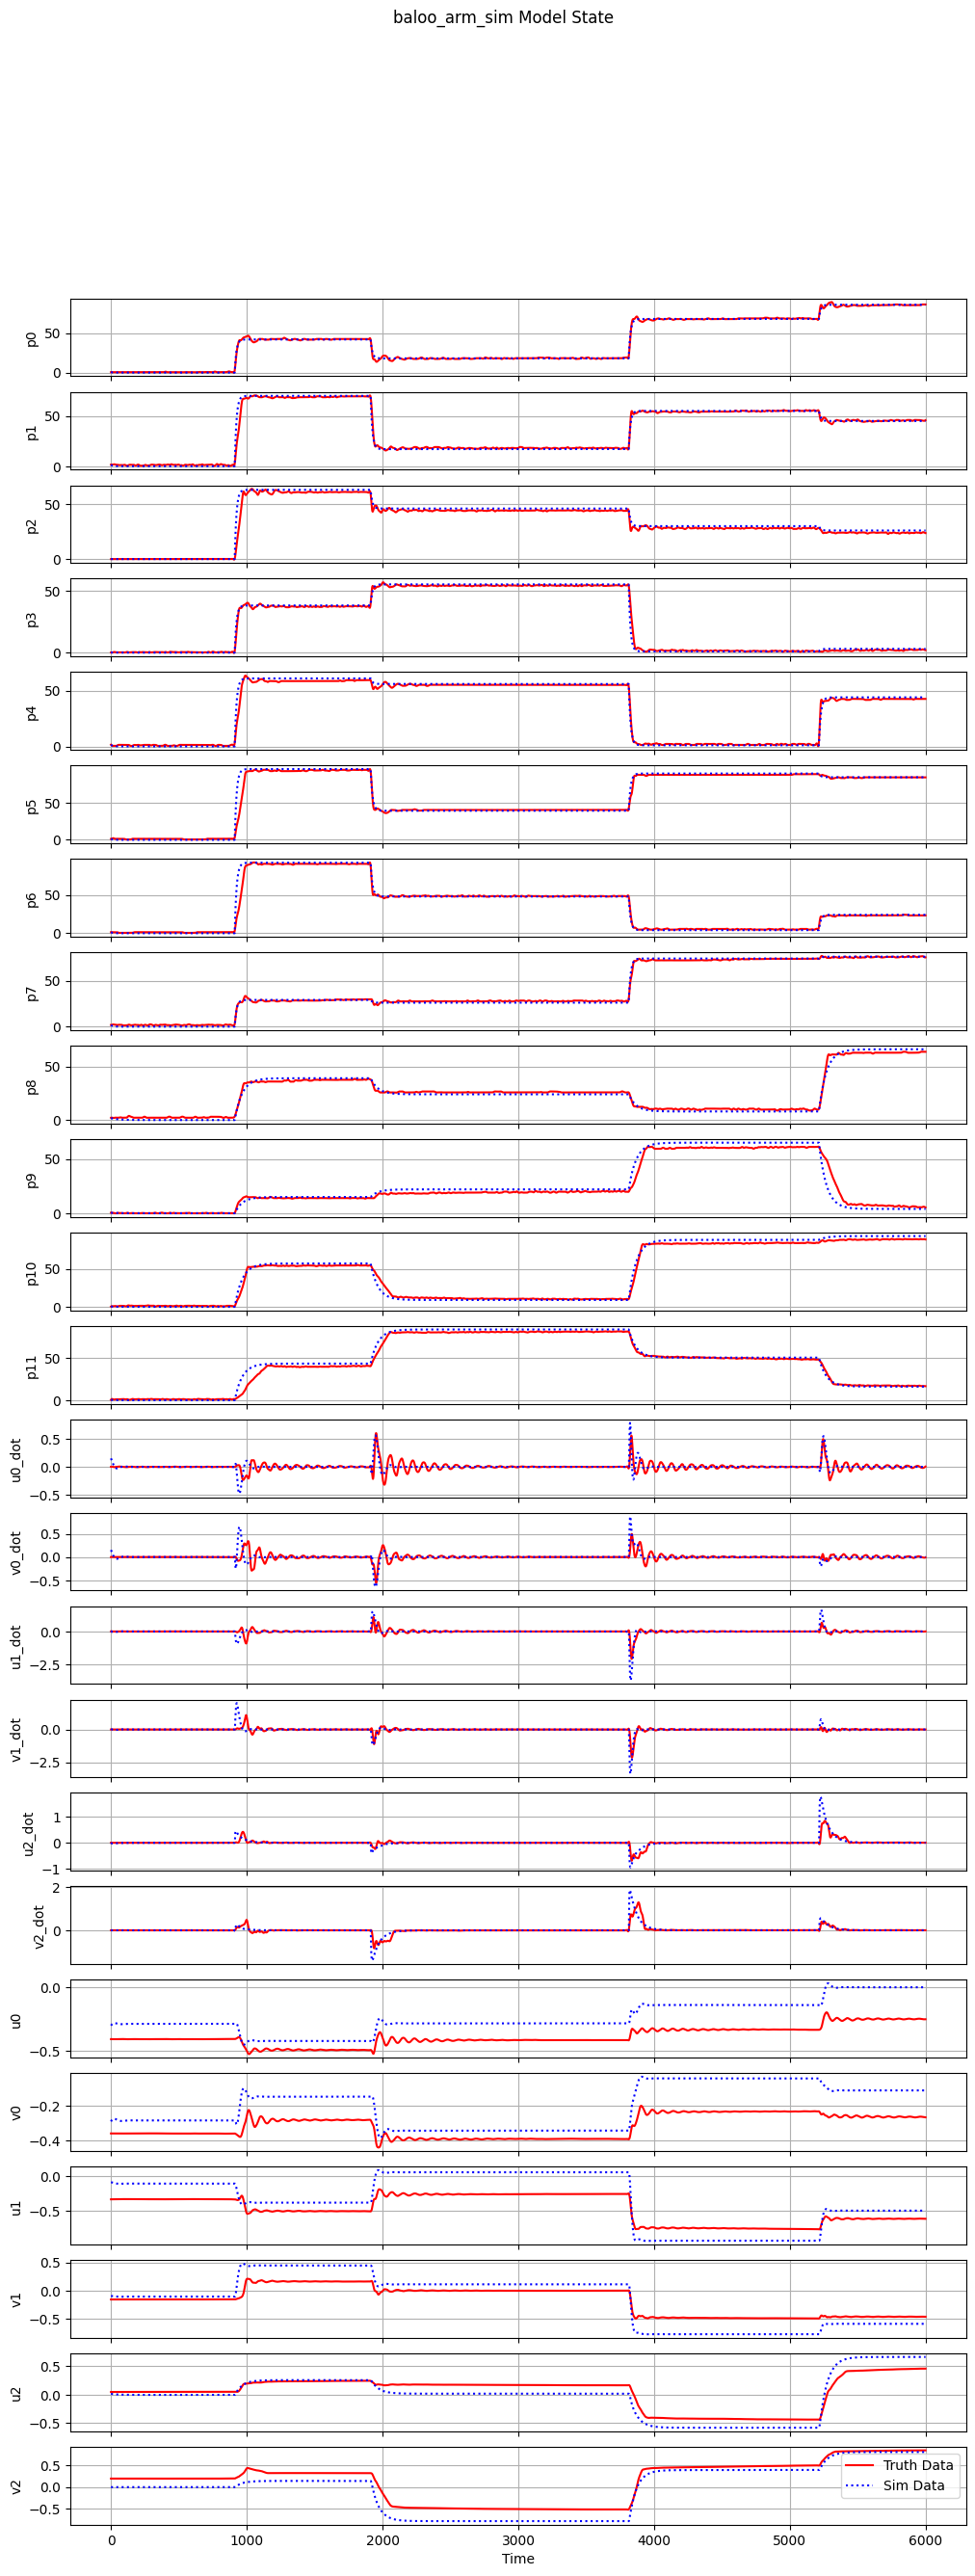

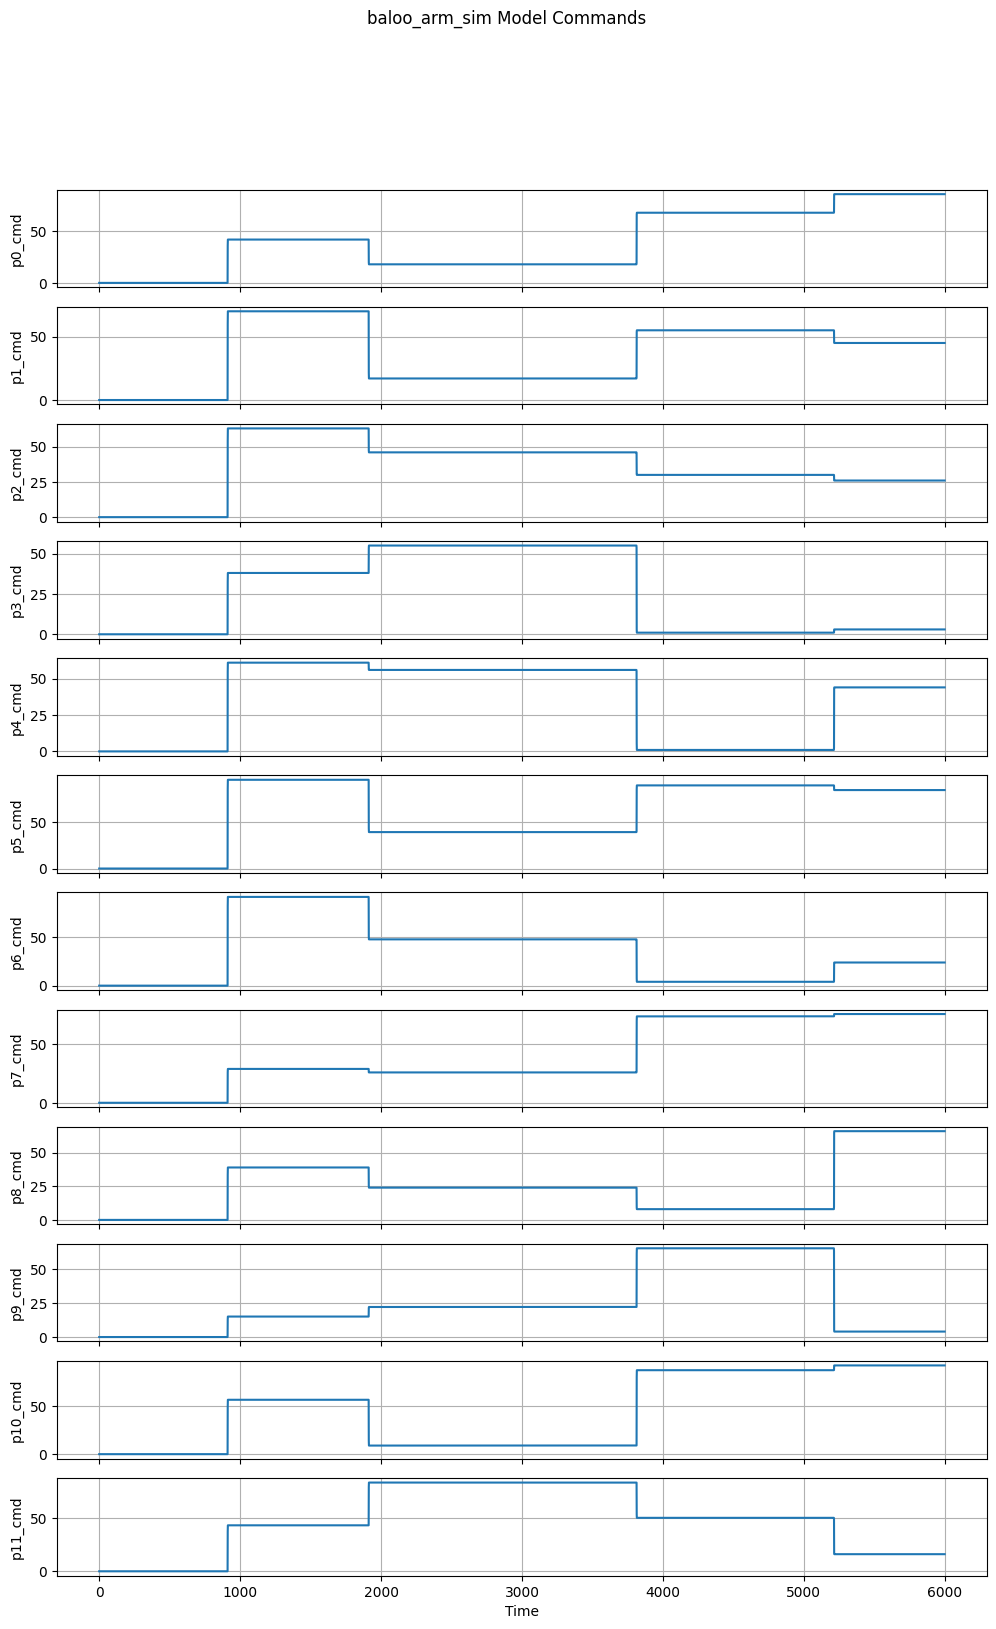

In [7]:
from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim
from moldy.case_studies.baloo_sim.model.generate_baloo_sim import generateBalooXML

# Compare the system id'd system to the data that we just fit too

# get sys id model
# generateBalooXML("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/baloo.xml",
#             "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/baloo_params_left.yaml")
# baloo_sys_id_model = BalooSim(XML_PATH='/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/baloo.xml')
generateBalooXML("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/sys_id_baloo.xml",
            "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/sys_id_params.yaml")
baloo_sys_id_model = BalooSim(XML_PATH='/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/sys_id_baloo.xml')

# x_truth_denorm = (x_truth * ((baloo_hw_model.xMax - baloo_hw_model.xMin) / 2)) + ((baloo_hw_model.xMax + baloo_hw_model.xMin) / 2)
# xdot_truth_denorm = (xdot_truth * ((baloo_hw_model.xMax - baloo_hw_model.xMin) / 2)) + ((baloo_hw_model.xMax + baloo_hw_model.xMin) / 2)
# u_denorm = (u * ((baloo_hw_model.uMax - baloo_hw_model.uMin) / 2)) + ((baloo_hw_model.uMax + baloo_hw_model.uMin) / 2)

# x_truth_denorm = x_truth
# xdot_truth_denorm = xdot_truth
# u_denorm = u

x_truth_denorm, xdot_truth_denorm, u_denorm = get_data("/home/daniel/Documents/data/daniel_baloo_data_collection/STEPCMDS/parsed_csvs/smooth_all_inputs_normalized.npy", 
                                            "/home/daniel/Documents/data/daniel_baloo_data_collection/STEPCMDS/parsed_csvs/smooth_all_outputs_normalized.npy")

start = 0
num_points = 6000 # x_truth_denorm.shape[0] #specify number of data points to simulate #18000-1 #1000 
dt = 0.01
# set initial x
x_sim = np.zeros((num_points, baloo_sys_id_model.numStates)) 
x = x_truth_denorm[start,:].reshape((1, baloo_sys_id_model.numStates))
Model
for i in range(100):
    baloo_sys_id_model.forward_simulate_dt(x, x[0, :12], dt)

for i in range(start, num_points+start):
    x = baloo_sys_id_model.forward_simulate_dt(x, u_denorm[i,:], dt)
    x_sim[i-start, :] = x.flatten()

AE = np.abs(x_sim - x_truth_denorm[start:num_points+start, :])  
IAE = AE.sum(axis=0)
np.set_printoptions(precision=3)
print(f'Joint 0 Pressures:  {IAE[:4]}')
print(f'Joint 1 Pressures:  {IAE[4:8]}')
print(f'Joint 2 Pressures:  {IAE[8:12]}\n')
print(f'Joint 0 Velocities: {IAE[12:14]}')
print(f'Joint 1 Velocities: {IAE[14:16]}')
print(f'Joint 2 Velocities: {IAE[16:18]}\n')
print(f'Joint 0 Positions: {IAE[18:20]}')
print(f'Joint 1 Positions: {IAE[20:22]}')
print(f'Joint 2 Positions: {IAE[22:24]}')

x_labels = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'u0_dot', 'v0_dot', 'u1_dot', 'v1_dot', 'u2_dot', 'v2_dot', 'u0', 'v0', 'u1', 'v1', 'u2', 'v2']
u_labels = ['p0_cmd', 'p1_cmd', 'p2_cmd', 'p3_cmd', 'p4_cmd', 'p5_cmd', 'p6_cmd', 'p7_cmd', 'p8_cmd', 'p9_cmd', 'p10_cmd', 'p11_cmd']
baloo_sys_id_model.plot_history(x_sim, u_denorm[start:num_points+start,:], x_truth_denorm[start:num_points+start,:], x_labels, u_labels, block=False)